<a href="https://www.kaggle.com/code/mariajgs/maria-de-jesus-garcia-santiago-t4?scriptVersionId=95880050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-dgru7vgf
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-dgru7vgf
  Resolved https://github.com/tensorflow/examples.git to commit ef9fcf969bc2f6a848ad69cfcd5f1dcd9474a1fb
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-ef9fcf969bc2f6a848ad69cfcd5f1dcd9474a1fb_-py3-none-any.whl size=299204 sha256=35d927202e649c8e127751e676c35971e5232c4d03baa6e78216a1a6cd38f696
  Stored in directory: /tmp/pip-ephem-wheel-cache-6t44hfft/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
  Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Di

# **Descripción**

Implemente un modelo UNET para segmentar tumores en imágenes de resonancia magnética (MRI) de cerebro humano.

Use la base de datos de kaggle MRI Brain Segmentation que consta de 110 volúmenes de resonancia magnética de igual número de pacientes. Por lo que se tendrán 110 directorios (uno por paciente) que contendrá imágenes .tif de tres canales (pre-contraste, FLAIR, post-contraste) correspondiente a rebanadas axiales. Cada imagen es acompañada por una máscara binaria almaceada en un archivo también .tif , sólo que de un solo canal.

Utilice el modelo en el tutorial de UNet para segmentación como base para implementar su tarea (debe ser en tensorflow-keras). En dicho tutorial se emplea como etapa
codificadora de UNet la red MobileNetV2 como backbone empleando pesos prentrenados con ImageNet.

* Empleé aumentación de datos.
* Evalúe una primera implementación fijando los pesos de la red backbone
* MobileNetV2 y entrenado el resto de la UNet.
* Evalúe liberando la etapa final convolucional de MobileNetV2 (fine tuning).
* Evalue, luego liberando toda la red (full-tuning).

Compare sus resultados con los obtenidos por
Brain_MRI_Segmentation_UsingTF_UNet](https://www.kaggle.com/code/israrah
med919/brain-mri-segmentation-usingtf-unet).
Envíe su tarea mediante un notebook de jupyter (archivo .ipynb) con la última ejecución,
mostrando ejemplos de as segmentaciones de cada caso implementado y sus métricas.
Discuta cómo se compara el desempeño del modelo imlementado con respecto a Brain_MRI_Segmentation_UsingTF_UNet.

# Importar data

In [2]:
import os
data_folder_path = "../input/lgg-mri-segmentation/kaggle_3m/"
data_folders = os.listdir(data_folder_path)

In [3]:
data_folders.remove('data.csv'), data_folders.remove('README.md')

(None, None)

In [5]:
#create images and masks directories to store images and masks
os.mkdir('images')
os.mkdir('masks')
#images and masks directory
images_folder = './images/'
masks_folder = './masks/'

In [6]:
#read all the images and masks and store in respective directories
import matplotlib.pyplot as plt
from PIL import Image
def read_and_save_images():
  c=0
  for folder in data_folders: #get each single folder
    files = os.listdir(data_folder_path+'/'+folder) #list all the files and masks in that folder
    for i in range(1, len(files)//2): #get single file
      img=Image.open(data_folder_path+'/'+folder+'/'+folder+'_'+str(i)+'.tif')
      img.save(images_folder+str(c)+'.tif')  
      mask=Image.open(data_folder_path+'/'+folder+'/'+folder+'_'+str(i)+'_mask.tif')  #TCGA_CS_4941_19960909_1_mask.tif
      mask.save(masks_folder+str(c)+'.tif')
      c += 1

In [7]:
read_and_save_images()

(-0.5, 255.5, 255.5, -0.5)

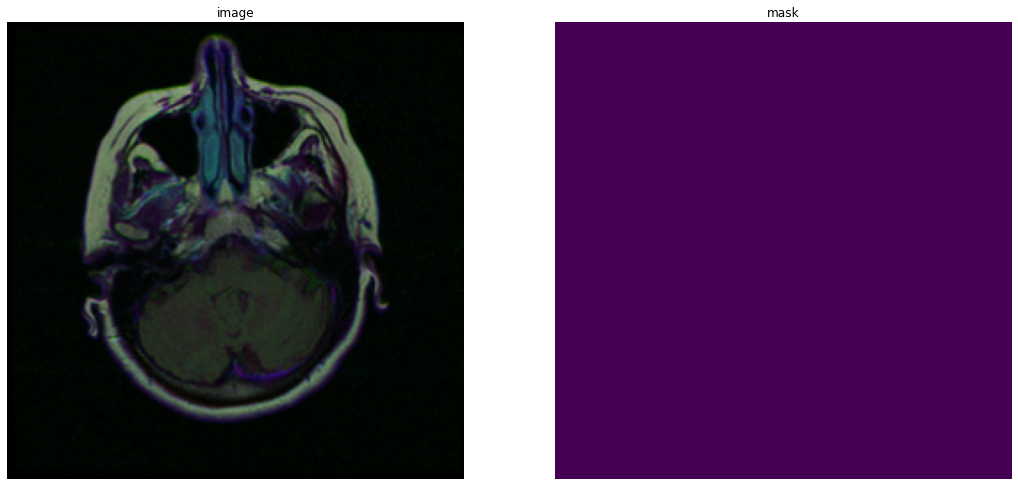

In [8]:
import random
images = os.listdir(images_folder)
masks = os.listdir(masks_folder)
rand_index = random.randint(0, len(images))
img = plt.imread(images_folder+images[rand_index])
mask = plt.imread(masks_folder+masks[rand_index])
plt.figure(figsize=(18,18))
plt.subplot(121)
plt.imshow(img)
plt.title('image')
plt.axis('off')
plt.subplot(122)
plt.imshow(mask)
plt.title('mask')
plt.axis('off')

In [9]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=0.2, random_state = 54)
print(f"train image length: {len(train_images)} \ntrain masks length: {len(train_masks)} \ntest images length: {len(test_images)} \ntest masks length: {len(test_masks)}") 

train image length: 3055 
train masks length: 3055 
test images length: 764 
test masks length: 764


(256, 256, 3) (256, 256)


(-0.5, 255.5, 255.5, -0.5)

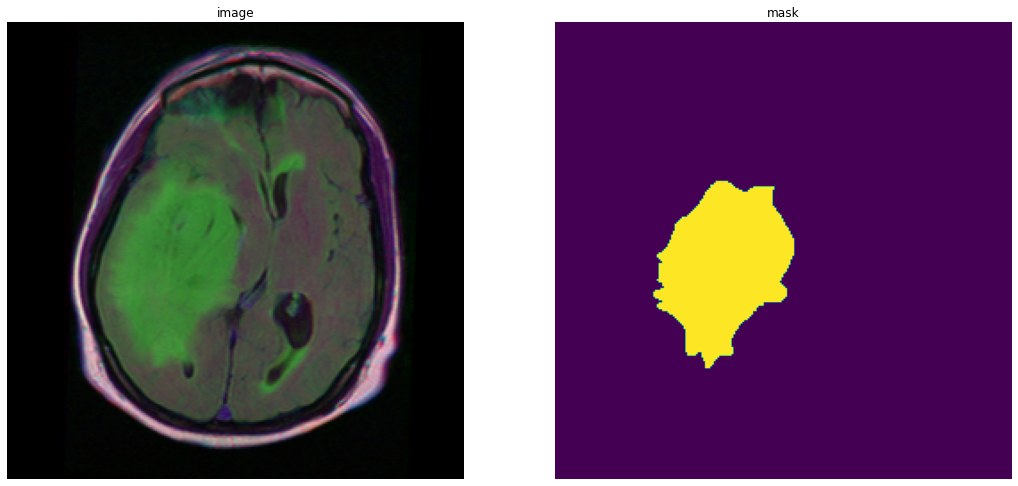

In [10]:
rand_index = random.randint(0, len(train_images))
img = plt.imread(images_folder+train_images[rand_index])
mask = plt.imread(masks_folder+train_masks[rand_index])
print(img.shape, mask.shape)
plt.figure(figsize=(18,18))
plt.subplot(121)
plt.imshow(img)
plt.title('image')
plt.axis('off')
plt.subplot(122)
plt.imshow(mask)
plt.title('mask')
plt.axis('off')

# Crear directorios 

In [11]:
if not os.path.exists("./Data/"):
    os.mkdir("./Data/")

In [12]:
if not os.path.exists("./Data/train_images/"):
    os.mkdir("./Data/train_images/")
if not os.path.exists("./Data/val_images/"):
    os.mkdir("./Data/val_images/")
if not os.path.exists("./Data/val_masks/"):
    os.mkdir("./Data/val_masks/")
if not os.path.exists("./Data/train_masks/"):
    os.mkdir("./Data/train_masks/")

In [13]:
if not os.path.exists("Data/train_images/train"):
    os.mkdir("Data/train_images/train")
if not os.path.exists("Data/val_images/val"):
    os.mkdir("Data/val_images/val")
if not os.path.exists("Data/val_masks/val"):
    os.mkdir("Data/val_masks/val")
if not os.path.exists("Data/train_masks/train"):
      os.mkdir("Data/train_masks/train")

In [14]:
#paths of folders
train_images_path = './Data/train_images/train/'
train_masks_path = './Data/train_masks/train/'
val_images_path = './Data/val_images/val/'
val_masks_path = './Data/val_masks/val/'

In [15]:
for x in train_images:
    img = Image.open(images_folder+x)
    img.save(train_images_path+x)
    mask = Image.open(masks_folder+x)
    mask.save(train_masks_path+x)

In [16]:
for x in test_images:
  img = Image.open(images_folder+x)
  img.save(val_images_path+x)
  mask = Image.open(masks_folder+x)
  mask.save(val_masks_path+x)

In [17]:
train_i = os.listdir(train_images_path)
train_m = os.listdir(train_masks_path)
val_i = os.listdir(val_images_path)
val_m = os.listdir(val_masks_path)
len(train_i), len(train_m), len(val_i), len(val_m)

(3055, 3055, 764, 764)

# Crear un dataset 

In [18]:
#paths of folders
train_images_path = './Data/train_images/'
train_masks_path = './Data/train_masks/'
val_images_path = './Data/val_images/'
val_masks_path = './Data/val_masks/'

In [19]:
#apply augmentation
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(54)
img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')
mask_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect',
                     preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype))

In [20]:
#create dataset 
#for training
image_data_generator = ImageDataGenerator(**img_data_gen_args, rescale=1.0/255.0)
train_image_generator = image_data_generator.flow_from_directory(train_images_path,
                                                           batch_size=26,
                                                           class_mode=None,
                                                           seed=54)
masks_data_generator = ImageDataGenerator(**mask_data_gen_args)
train_mask_generator = masks_data_generator.flow_from_directory(train_masks_path,
                                                                class_mode=None,
                                                                seed=54,
                                                                batch_size=26)
#for validation
image_data_generator = ImageDataGenerator(rescale=1.0/255.0)
test_image_generator=image_data_generator.flow_from_directory(val_images_path,
                                                              batch_size=26,
                                                              seed=54,
                                                              class_mode=None)
test_masks_generator = image_data_generator.flow_from_directory(val_masks_path,
                                                                batch_size=26,
                                                                seed=54,
                                                                class_mode=None)

Found 3055 images belonging to 1 classes.
Found 3055 images belonging to 1 classes.
Found 764 images belonging to 1 classes.
Found 764 images belonging to 1 classes.


In [21]:
#create a function
import numpy as np
def image_mask_generator(image_generator, mask_generator):
  train_generator = zip(image_generator, mask_generator)
  for (img, mask) in train_generator:
    mask=mask[:,:,:,0]
    mask=np.expand_dims(mask, axis=3)
    yield (img, mask) 

In [22]:
train_datagen = image_mask_generator(train_image_generator, train_mask_generator)
test_datagen  = image_mask_generator(test_image_generator, test_masks_generator)

# Visualización del dataset 

(256, 256, 3) (256, 256, 1)


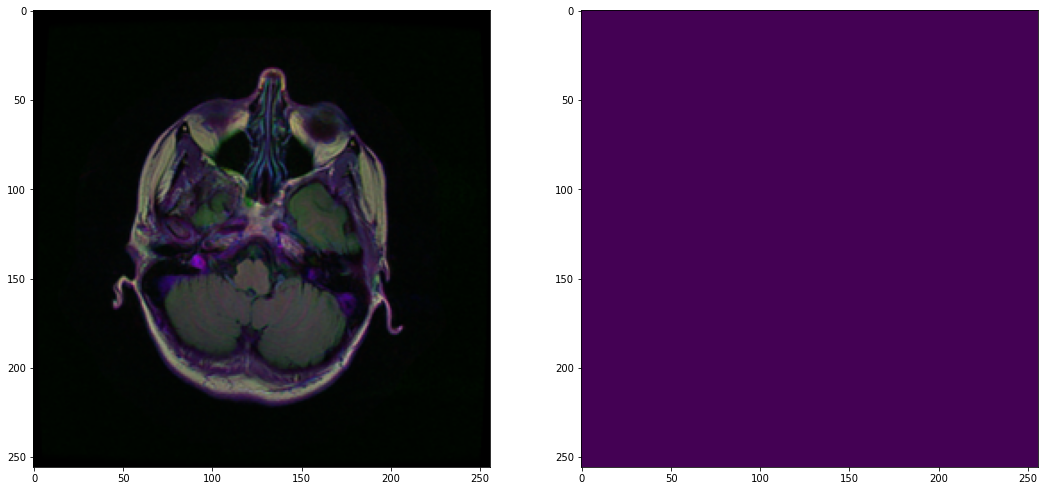

In [23]:
#for combine
import matplotlib.pyplot as plt
#x, y = train_datagen.__next__()
x, y = test_datagen.__next__()
plt.figure(figsize=(18,18))
for i in range(0,1):
    image = x[i]
    mask = y[i]
    print(image.shape, mask.shape)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()

In [24]:
#lets check min and max of each of the image and mask
image.max(), mask.max(), image.min(), mask.min(), image.shape, mask.shape

(0.8078432, 0.0, 0.0, 0.0, (256, 256, 3), (256, 256, 1))

# Model 

In [65]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False #no entrena las capas convolucionales

In [66]:
import tensorflow as tf

import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [36]:
!pip install tensorflow

In [38]:
from tensorflow.keras.layers import Activation 

In [67]:
def unet_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        filters=output_channels, kernel_size=3, strides=2,
        padding='same')  #64x64 -> 128x128
    x = last(x)
    x = Activation("sigmoid")(x) #agregamos una capa de activación al final para poder obtener los resultados de la predicción del mask 
    return tf.keras.Model(inputs=inputs, outputs=x)

In [68]:
from tensorflow.keras.optimizers import Adam
OUTPUT_CLASSES = 1

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer=Adam(learning_rate=1e-4),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              loss="binary_crossentropy",
              metrics=['accuracy'])

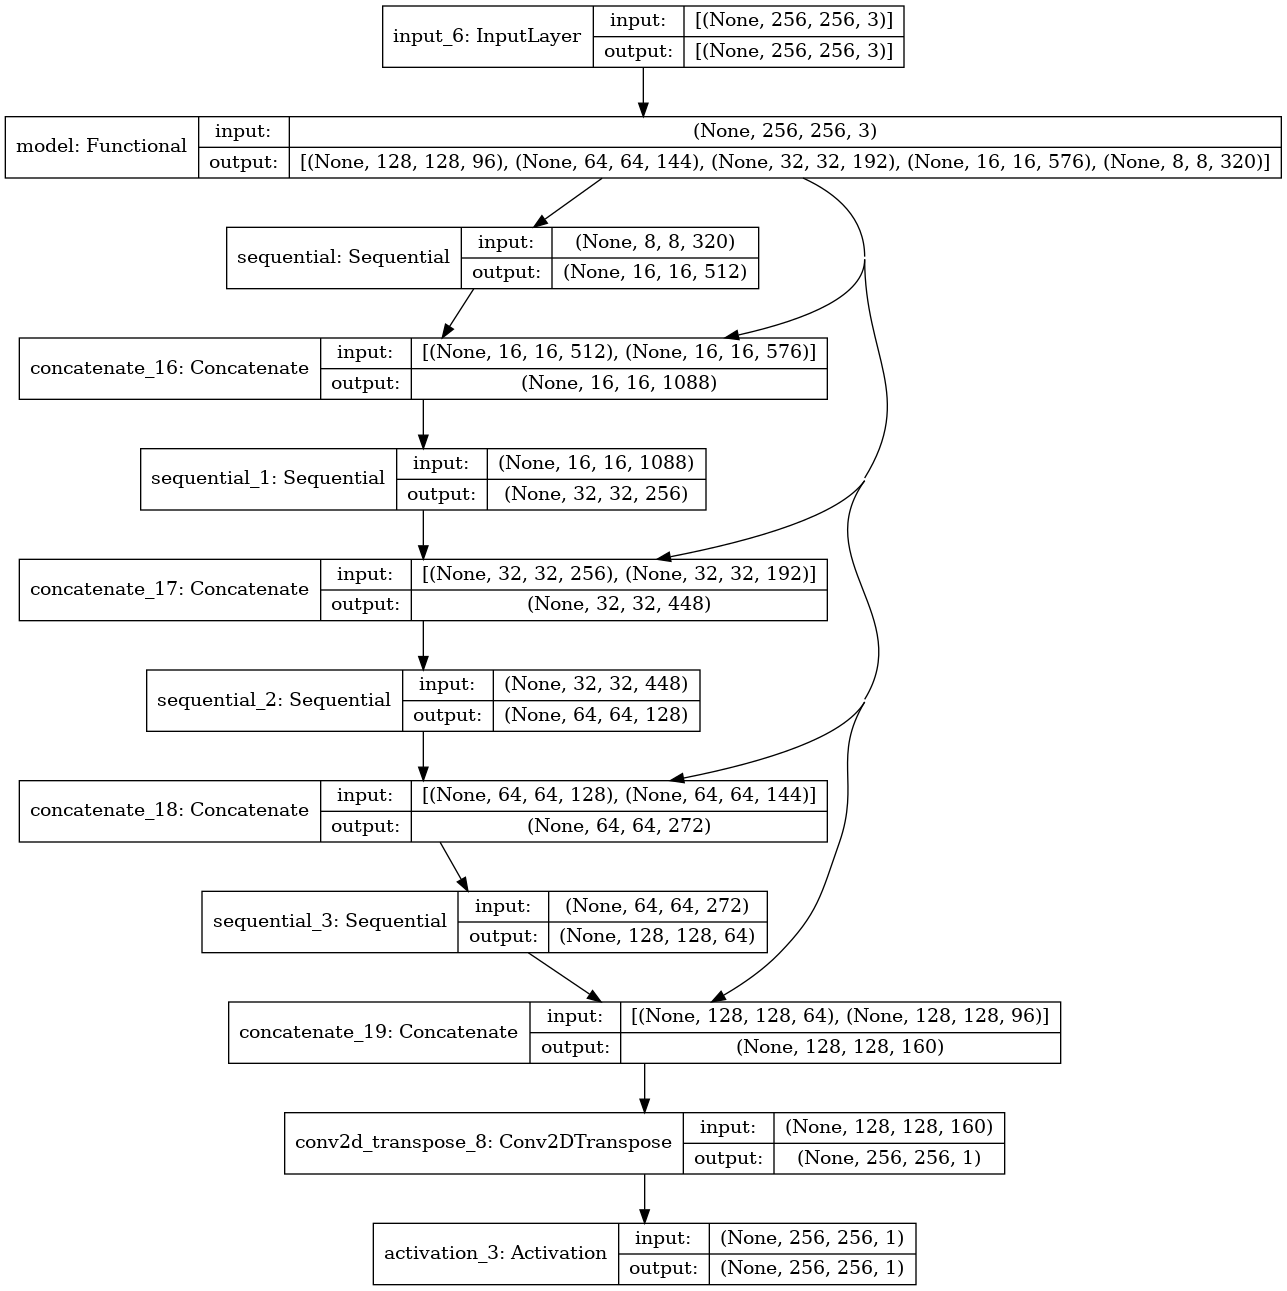

In [51]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [52]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [53]:
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                 create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [63]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [69]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = len(test_image_generator)//VAL_SUBSPLITS
steps_per_epoch = len(train_image_generator)
train_batches = 64

model_history = model.fit(train_datagen,
                          epochs=EPOCHS,
                          steps_per_epoch=steps_per_epoch,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_datagen,
                          callbacks=early_stopping)

Epoch 1/20
118/118 [==============================] - 92s 766ms/step - loss: 0.3361 - accuracy: 0.8720 - val_loss: 0.1484 - val_accuracy: 0.9888
Epoch 2/20
118/118 [==============================] - 87s 740ms/step - loss: 0.1046 - accuracy: 0.9874 - val_loss: 0.0831 - val_accuracy: 0.9865
Epoch 3/20
118/118 [==============================] - 88s 748ms/step - loss: 0.0615 - accuracy: 0.9892 - val_loss: 0.0518 - val_accuracy: 0.9908
Epoch 4/20
118/118 [==============================] - 88s 746ms/step - loss: 0.0439 - accuracy: 0.9910 - val_loss: 0.0357 - val_accuracy: 0.9919
Epoch 5/20
118/118 [==============================] - 87s 741ms/step - loss: 0.0360 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9925
Epoch 6/20
118/118 [==============================] - 88s 753ms/step - loss: 0.0308 - accuracy: 0.9924 - val_loss: 0.0228 - val_accuracy: 0.9949
Epoch 7/20
118/118 [==============================] - 87s 737ms/step - loss: 0.0298 - accuracy: 0.9921 - val_loss: 0.0231 - val_ac

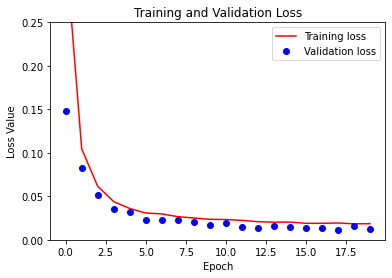

In [70]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.25])
plt.legend()
plt.show()

In [71]:
model.save('model1.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [72]:
val_images, mask_images = next(test_datagen)

In [74]:
img, masked = val_images[2], mask_images[2]

In [ ]:
img.shape, masked.shape

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    image_, mask_ = next(dataset)
    for image, mask in zip(image_, mask_):
      pred_mask = model.predict(np.expand_dims(img, 0))
      display([image, mask, create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
show_predictions(test_datagen, 0)

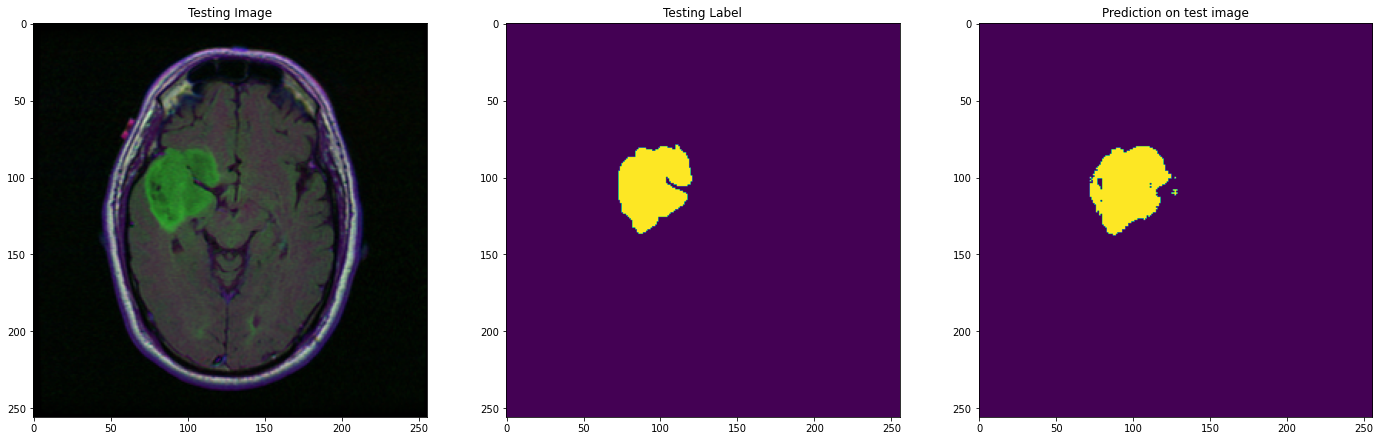

In [79]:
#making predictions
#threshold = 0.5
#test_img_number = random.randint(0, num_vals-1)
'''
x, y=test_datagen.__next__()
for i in range(0,1):
    test_img=x[i]
    ground_truth=y[i]
    print(ground_truth.shape)

'''

# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img_input = np.expand_dims(img, 0)
#prediction = model(test_img_input)
#prediction = 
prediction = (model.predict(test_img_input)[0,:,:,:] > 0.5).astype(np.uint8)
plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(masked)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction)
plt.show()

# Ajuste fino 

In [80]:
last_conv=[ 'block_16_project']#entrenamos con la última capa convolucional 
for layer in down_stack.layers:
    if layer.name in last_conv:
        layer.trainable = True
    else:
        layer.trainable = False

In [81]:
model = unet_model(output_channels=OUTPUT_CLASSES)

model.compile(optimizer=Adam(learning_rate=1e-4),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [82]:
EPOCHS = 15
VAL_SUBSPLITS = 5
VALIDATION_STEPS = len(test_image_generator)//VAL_SUBSPLITS
steps_per_epoch = len(train_image_generator)
train_batches = 64

model_history = model.fit(train_datagen,
                          epochs=EPOCHS,
                          steps_per_epoch=steps_per_epoch,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_datagen,
                          callbacks=early_stopping)

Epoch 1/15
118/118 [==============================] - 96s 802ms/step - loss: 0.1825 - accuracy: 0.9831 - val_loss: 0.0852 - val_accuracy: 0.9896
Epoch 2/15
118/118 [==============================] - 89s 762ms/step - loss: 0.0649 - accuracy: 0.9907 - val_loss: 0.0496 - val_accuracy: 0.9900
Epoch 3/15
118/118 [==============================] - 90s 764ms/step - loss: 0.0423 - accuracy: 0.9919 - val_loss: 0.0344 - val_accuracy: 0.9927
Epoch 4/15
118/118 [==============================] - 89s 755ms/step - loss: 0.0331 - accuracy: 0.9927 - val_loss: 0.0270 - val_accuracy: 0.9940
Epoch 5/15
118/118 [==============================] - 89s 761ms/step - loss: 0.0274 - accuracy: 0.9934 - val_loss: 0.0218 - val_accuracy: 0.9951
Epoch 6/15
118/118 [==============================] - 89s 754ms/step - loss: 0.0248 - accuracy: 0.9936 - val_loss: 0.0203 - val_accuracy: 0.9950
Epoch 7/15
118/118 [==============================] - 90s 764ms/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.0170 - val_ac

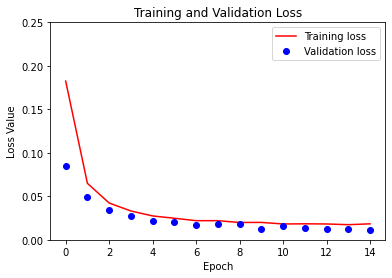

In [83]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.25])
plt.legend()
plt.show()

In [84]:
model.save('model2.h5')

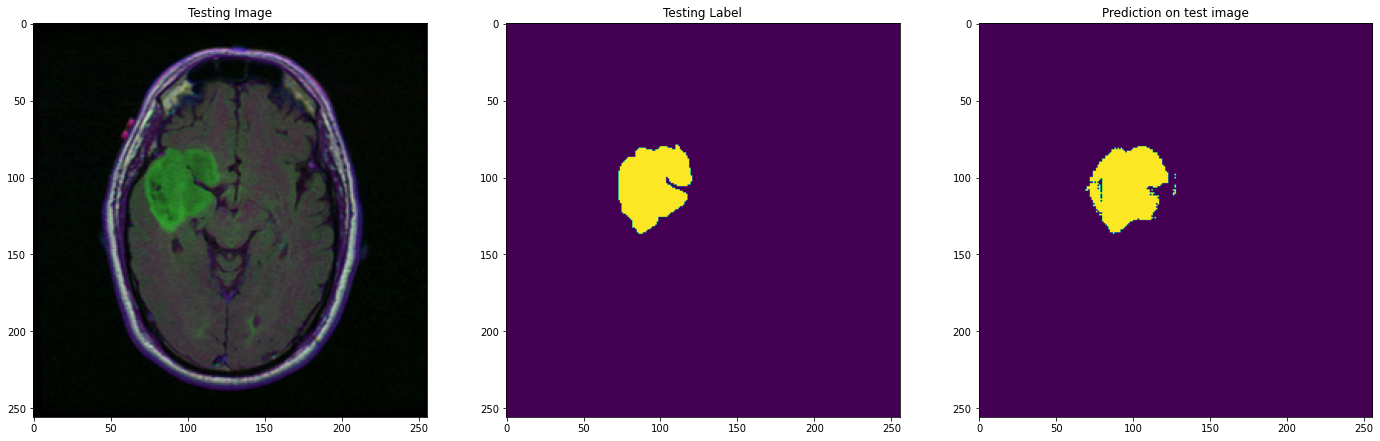

In [85]:
test_img_input = np.expand_dims(img, 0)
#prediction = model(test_img_input)
#prediction = 
prediction = (model.predict(test_img_input)[0,:,:,:] > 0.5).astype(np.uint8)
plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(masked)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction)
plt.show()

#  Entrenamos con todas las capas (full tuning)

En esta parte volvemos a implementar el modelo desde el inicio considerando ahora que si vamos a entrenar todas las capas convolucionales. 

In [86]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = True

In [87]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [88]:
def unet_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        filters=output_channels, kernel_size=3, strides=2,
        padding='same')  #64x64 -> 128x128
    x = last(x)
    x = Activation("sigmoid")(x)
    return tf.keras.Model(inputs=inputs, outputs=x)

In [89]:
model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer=Adam(learning_rate=1e-4),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [90]:
EPOCHS = 15
VAL_SUBSPLITS = 5
VALIDATION_STEPS = len(test_image_generator)//VAL_SUBSPLITS
steps_per_epoch = len(train_image_generator)
train_batches = 64

model_history = model.fit(train_datagen,
                          epochs=EPOCHS,
                          steps_per_epoch=steps_per_epoch,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_datagen,
                          callbacks=early_stopping)

Epoch 1/15
118/118 [==============================] - 101s 819ms/step - loss: 0.2992 - accuracy: 0.9173 - val_loss: 0.1642 - val_accuracy: 0.9910
Epoch 2/15
118/118 [==============================] - 96s 821ms/step - loss: 0.0773 - accuracy: 0.9927 - val_loss: 0.0891 - val_accuracy: 0.9898
Epoch 3/15
118/118 [==============================] - 96s 819ms/step - loss: 0.0419 - accuracy: 0.9944 - val_loss: 0.0631 - val_accuracy: 0.9914
Epoch 4/15
118/118 [==============================] - 95s 812ms/step - loss: 0.0298 - accuracy: 0.9946 - val_loss: 0.0426 - val_accuracy: 0.9944
Epoch 5/15
118/118 [==============================] - 97s 826ms/step - loss: 0.0218 - accuracy: 0.9958 - val_loss: 0.0372 - val_accuracy: 0.9935
Epoch 6/15
118/118 [==============================] - 95s 805ms/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 0.0314 - val_accuracy: 0.9945
Epoch 7/15
118/118 [==============================] - 96s 818ms/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.0243 - val_a

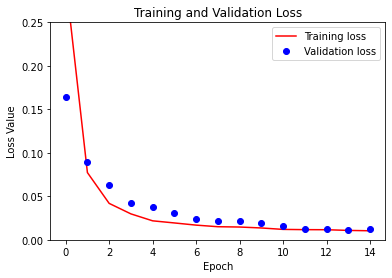

In [91]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.25])
plt.legend()
plt.show()

In [92]:
model.save('model3.h5')

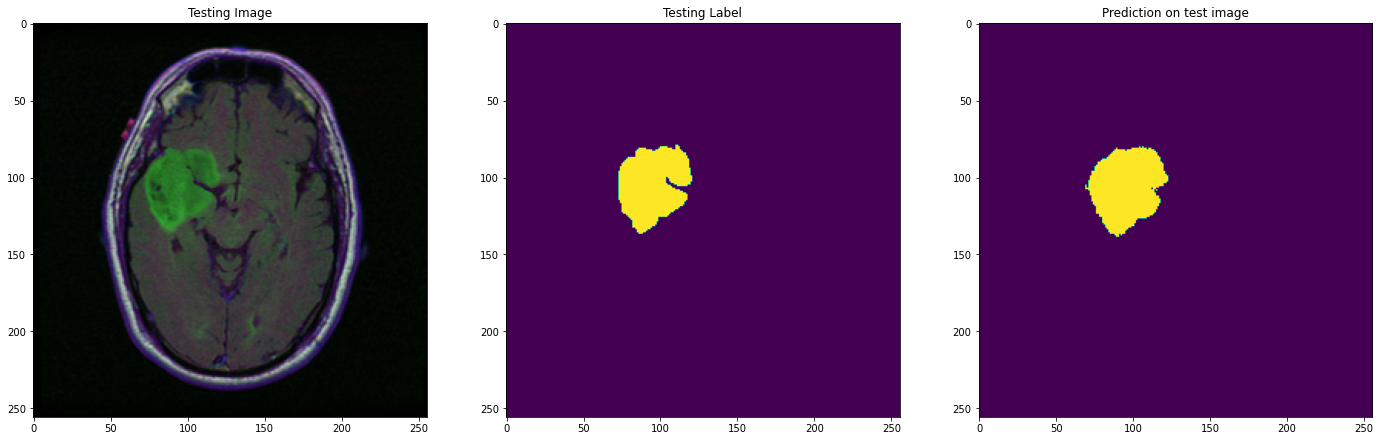

In [93]:
test_img_input = np.expand_dims(img, 0)
#prediction = model(test_img_input)
#prediction = 
prediction = (model.predict(test_img_input)[0,:,:,:] > 0.5).astype(np.uint8)
plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(masked)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction)
plt.show()

# Conclusiones 

Los resultados que se obtuvieron fue que la mejor predicción de las mascara de cada imagen original del cerebro fue cuando al modelo se le hizo full tuning, aunque en comparación al notebook usado de referencia se obtienen mejores resultados desde el primer modelo ya que si logra predecir la mascara. Otra de las diferencias es que en el modelo de referencia no se implementa la unet con Mobilenetv2 ni con la capa de activación que se agrego al final del modelo, y por supuesto no se aplico full tuning. Por otro lado, se obtuvieron niveles altos de accuracy en todos los modelos que se implementaron con una perdida baja. 
